#### Importing and initializing

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=true)

#### How do diferentiation works with sympy

#### Also how to turn simpy functions into lambda functions (usable callable)

In [139]:
teste_func = sin(x)
a_func = lambdify([x],diff(teste_func,x,1))
print(a_func(3.14/2))


0.0007963267107332633


#### Defining the taylor Series

![Alt text](https://media.geeksforgeeks.org/wp-content/uploads/20230605160532/Taylor-Series-Sigma-Notation.png)

In [169]:
def Serie_taylor(func,n_limit,variable = [x]):
    f = lambdify(variable,func)(0)
    for i in range(n_limit-1):
        c = lambdify(variable,diff(func,x,i+1))
        #print(a)
        f = f + (c(0)*x**(i+1))/factorial(i+1)
    #print(f)
    #f = lambdify(variable, f)
    return f



Testing it

In [62]:
Serie_taylor(cos(x),1)

#### With the taylor series we got a problem

##### When we lambdify a constant, it doesn't do operations on arrays anymore, so we have to vectorize it

##### This only affect the function with constant results, functions with polinomial results aren't affected

In [125]:
tt = np.array([1,2,3,4,5])

func_test = lambdify([x],Serie_taylor(sin(x),2))
print(func_test(tt))

func_retest = np.vectorize(lambdify([x],Serie_taylor(sin(x),1)))
print(func_retest(tt))

[1. 2. 3. 4. 5.]
[0. 0. 0. 0. 0.]


test

In [120]:
h = np.vectorize(lambdify(x, diff(x**2,x,2)))
print(h(tt))

[2 2 2 2 2]


## All together

In [1]:
terms = 1             #Change this value to show the terms in the taylor series
func = cos(x)         #Change this value to calculate a different function
t = np.arange(-10, 10, 0.01)

fig, ax = plt.subplots()

ax.set(xlabel='t', ylabel='y', title='About as simple as it gets, folks')

ax.grid()

s1 = np.vectorize(lambdify([x],Serie_taylor(func,terms)))
s2 = np.vectorize(lambdify([x],func))

print(s1(t))
print(s2(t))

ax.plot(t, s1(t), "b-")
ax.plot(t, s2(t), "r--")
# limit x by -5 to 5
plt.ylim(-1.5, 1.5)
plt.show()



NameError: name 'euler' is not defined

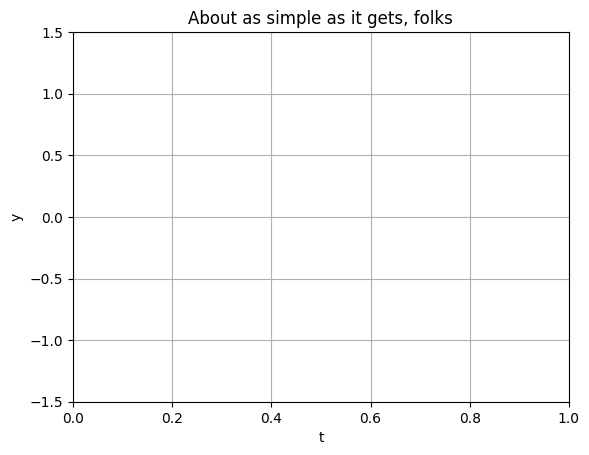

ValueError: x and y must have same first dimension, but have shapes (1,) and (2000,)

In [185]:
terms = 10            #Change this value to show the terms in the taylor series
func = cos(x)         #Change this value to calculate a different function
t = np.arange(-10, 10, 0.01)

fig,ax = plt.subplots()

ax.set(xlabel='t', ylabel='y', title='About as simple as it gets, folks')

ax.grid()

s2 = np.vectorize(lambdify([x],func))

functions = [
    ('1 term', np.vectorize(lambdify([x],Serie_taylor(func,1))), 'b-'),
    ('3 term', np.vectorize(lambdify([x],Serie_taylor(func,3))), 'r--'),
]

# limit x by -5 to 5
plt.ylim(-1.5, 1.5)
plt.show(block = False)

for label, y, style in functions:

    ax.plot(x, y(t), style, label = label)
    ax.legend()
    fig.canvas.draw()
    plt.pause(5)
